# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
# set the plotting style
sns.set_style("whitegrid")

# plot tree model
import graphviz

# Model preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Train-test splits and cross validation
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn import tree
import xgboost as xgb

# Model metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from scipy.stats import uniform, randint

# Logistic function
from scipy.special import expit

# The problem

Use of Machine learning to diagnose breast masses as benign or malignant cancer



# Load the data

##### $\rightarrow$ Loading the Wisconsin breast cancer data set.

http://pages.cs.wisc.edu/~olvi/uwmp/cancer.html

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [ ]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

##### $\rightarrow$ Display of the feature names and target names.

In [ ]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

Defining of the class names with benign first and malignant second.

In [ ]:
class_names = ['benign', 'malignant']

##### $\rightarrow$ To create a Pandas DataFrame with the features and target classes.

In [ ]:
df = pd.DataFrame(data=bc.data, columns=bc.feature_names)

# Use 1 - bc.target to code benign = 0, malignant = 1
df['class'] = 1 - bc.target

## Explore the contents of the data sets

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Used the `info` method to check the data types, size of the data frame, and numbers of missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

There are no missing values.

The data types appear appropriate for the data set.

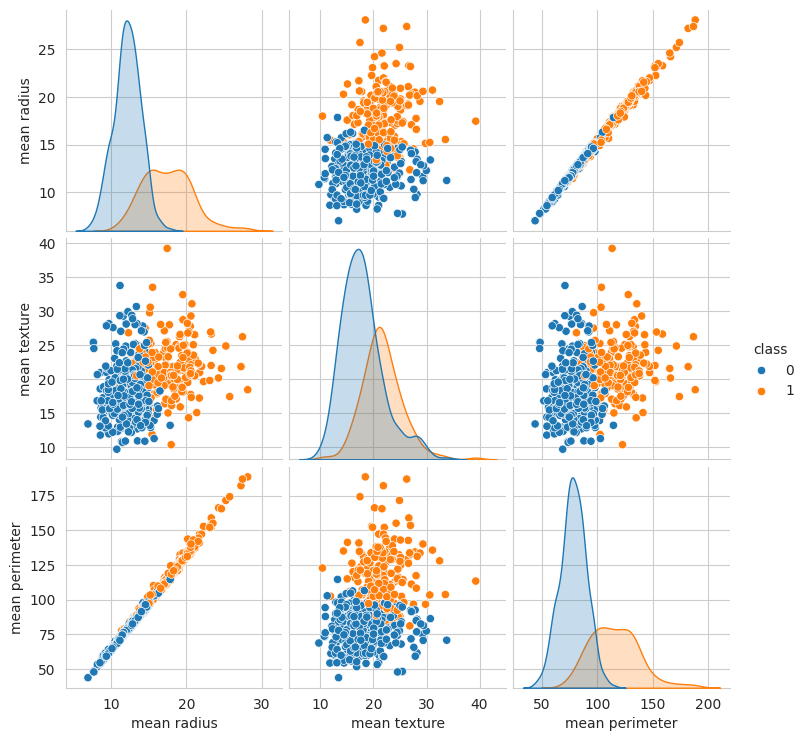

In [ ]:
sns.pairplot(data = df.iloc[:, np.r_[np.arange(3), 30]], hue='class');

It is clear that benign and malignant tumors have different features. It is reasonable to approach classifying the tumors based on the data collected.

# Data preparation

### Quality control

Checking the minimum and maximum values in each numerical column:

In [ ]:
df.drop(columns='class').agg(['min', 'max']).T

,min,max
mean radius,6.981000,28.11000
mean texture,9.710000,39.28000
mean perimeter,43.790000,188.50000
mean area,143.500000,2501.00000
mean smoothness,0.052630,0.16340
mean compactness,0.019380,0.34540
mean concavity,0.000000,0.42680
mean concave points,0.000000,0.20120
mean symmetry,0.106000,0.30400
mean fractal dimension,0.049960,0.09744


There are no obviously out-of-range values.

To check for any duplicated rows

In [ ]:
df.duplicated().sum()

0

There are no duplicate rows.

Cleaning the column names to replace the blank spaces with underscores.

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'class'],
      dtype='object')

In [ ]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


## Produce a train/test split for model comparison

In [ ]:
X = df.drop(columns = 'class')

y = df['class']

#### Train and test splits

Splitting the data into training and testing sets. Keeping 20% of the data for the test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

In [ ]:
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


To check if the training and testing input variables have similar means and standard deviations.

In [ ]:
X_train.agg(['mean','std']).round(2).T

,mean,std
mean_radius,14.21,3.62
mean_texture,19.35,4.40
mean_perimeter,92.57,24.99
mean_area,664.58,362.60
mean_smoothness,0.10,0.01
mean_compactness,0.11,0.05
mean_concavity,0.09,0.08
mean_concave_points,0.05,0.04
mean_symmetry,0.18,0.03
mean_fractal_dimension,0.06,0.01


In [ ]:
X_test.agg(['mean','std']).round(2).T

,mean,std
mean_radius,13.78,3.11
mean_texture,19.03,3.89
mean_perimeter,89.56,21.23
mean_area,616.20,303.92
mean_smoothness,0.10,0.02
mean_compactness,0.10,0.06
mean_concavity,0.09,0.08
mean_concave_points,0.05,0.04
mean_symmetry,0.18,0.03
mean_fractal_dimension,0.06,0.01


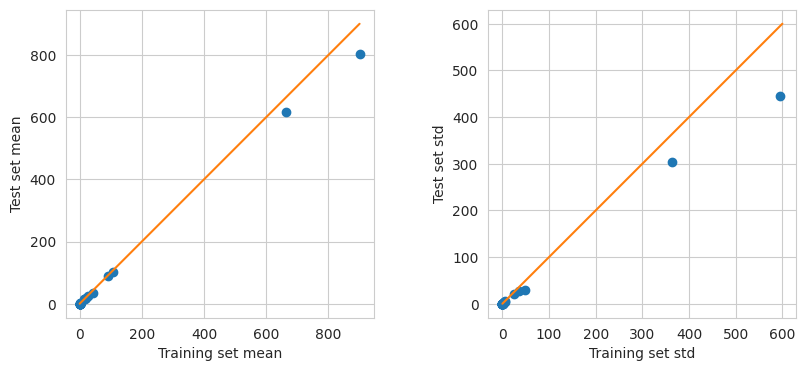

In [ ]:
plt.subplots(1,2, figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(X_train.mean(), X_test.mean(), 'o')
plt.plot([0, 900], [0, 900])

plt.xlabel('Training set mean')
plt.ylabel('Test set mean')
plt.axis('square')

plt.subplot(1,2,2)
plt.plot(X_train.std(), X_test.std(), 'o')
plt.plot([0, 600], [0, 600])

plt.xlabel('Training set std')
plt.ylabel('Test set std')
plt.axis('square');

In [ ]:
df['class'].value_counts()

,count
class,
0,357
1,212


In [ ]:
y_train.value_counts(normalize=True)

,proportion
class,
0,0.626374
1,0.373626


In [ ]:
y_test.value_counts(normalize=True)

,proportion
class,
0,0.631579
1,0.368421


### Scale the numerical predictor variables in the training set to have mean 0 and standard deviation 1.

In [ ]:
X_train.select_dtypes(include='number')

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
386,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
404,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.254500,0.114900,0.2202,0.06113,...,22.630,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,0.1399,0.05688,...,11.950,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769
72,17.20,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,0.1927,0.06487,...,23.320,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390
235,14.03,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835,...,15.330,30.28,98.27,715.5,0.12870,0.15130,0.06231,0.07963,0.2226,0.07617


In [ ]:
numerical_columns = X_train.select_dtypes(include='number').columns.to_list()

In [ ]:
scaler = StandardScaler().fit(X_train[numerical_columns])

Performing the scaling transform on the predictors in the training and testing sets.

In [ ]:
X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

Checking the mean and standard deviation of the transformed data.

In [ ]:
print(np.mean(X_train[numerical_columns], axis = 0).round(2))
print(np.std(X_train[numerical_columns], axis = 0))

print(np.mean(X_test[numerical_columns], axis = 0).round(2))
print(np.std(X_test[numerical_columns], axis = 0).round(2))

mean_radius               -0.0
mean_texture               0.0
mean_perimeter             0.0
mean_area                  0.0
mean_smoothness           -0.0
mean_compactness           0.0
mean_concavity             0.0
mean_concave_points        0.0
mean_symmetry             -0.0
mean_fractal_dimension    -0.0
radius_error               0.0
texture_error             -0.0
perimeter_error            0.0
area_error                -0.0
smoothness_error          -0.0
compactness_error          0.0
concavity_error            0.0
concave_points_error      -0.0
symmetry_error            -0.0
fractal_dimension_error    0.0
worst_radius               0.0
worst_texture              0.0
worst_perimeter           -0.0
worst_area                 0.0
worst_smoothness           0.0
worst_compactness          0.0
worst_concavity           -0.0
worst_concave_points       0.0
worst_symmetry             0.0
worst_fractal_dimension    0.0
dtype: float64
mean_radius                1.0
mean_texture            

In [ ]:
df_train = X_train.join(y_train)

In [ ]:
df_train.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,class
408,1.044985,0.297085,1.010448,0.903128,0.526420,0.488082,0.379781,0.981747,0.663632,-0.302590,...,-0.046983,0.857380,0.754906,0.724632,0.758927,0.284225,1.218398,0.298119,0.083807,1
4,1.681411,-1.140982,1.703381,1.746022,0.286087,0.534308,1.351402,1.389686,-0.008492,-0.579773,...,-1.438180,1.262419,1.135042,0.237388,-0.330625,0.626789,0.697164,-0.885950,-0.412347,1
307,-1.442609,-1.127329,-1.450464,-1.154826,-1.916968,-1.423329,-1.072274,-1.171440,-0.085621,0.835949,...,-0.896982,-1.360278,-1.033921,-1.512633,-1.317883,-1.261384,-1.522338,0.180732,-0.336571,0
386,-0.554380,-1.197867,-0.552455,-0.559306,-1.113672,-0.516737,-0.265180,-0.615972,-0.607160,-0.175920,...,-1.021139,-0.591854,-0.622836,-1.332623,-0.084264,0.173957,-0.364720,-0.353460,0.276857,0
404,-0.518408,-1.002181,-0.572082,-0.539704,-0.695638,-1.143089,-0.855138,-0.737897,-0.882620,-0.840564,...,-1.409529,-0.693544,-0.617453,-1.233370,-1.220114,-1.092356,-1.013948,-0.998233,-1.437133,0


In [ ]:
df_test = X_test.join(y_test)

In [ ]:
df_test.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,class
421,0.131853,-1.222897,0.226193,-0.023421,0.490006,1.512741,0.690351,0.340627,1.008876,1.689854,...,-1.172357,0.167953,-0.153048,-0.042327,0.694266,0.244038,-0.074980,-0.098272,0.507794,0
47,-0.288741,-0.157999,-0.264067,-0.358867,1.414925,0.347481,0.410963,0.604797,1.163134,0.752496,...,0.357324,-0.156653,-0.236812,2.096136,1.037620,1.119808,1.388658,1.727167,2.060609,1
292,-0.349617,-0.758711,-0.377820,-0.416569,0.300653,-0.493625,-0.350493,-0.403620,-0.298644,0.294994,...,-0.919267,-0.558532,-0.529484,0.729144,-0.318986,-0.235258,-0.152642,0.842518,0.733921,0
186,1.133531,-0.176203,1.042491,1.039239,-0.764096,-0.392507,-0.099294,0.217179,-0.698980,-1.262301,...,0.104234,0.888979,0.857509,-0.394226,-0.075211,0.400373,0.616514,0.546501,-0.857383,1
414,0.253604,2.379096,0.165711,0.151619,-0.959276,-1.136540,-0.533717,-0.563900,0.149439,-1.457521,...,1.783539,0.053048,0.052495,-0.782217,-1.018240,-0.575372,-0.747805,0.592435,-1.322265,1


# Exploratory data analysis

### Examine distributions and relationships

Plot of the correlation matrix of the numerical variables in the training data to explore relationships between the variables.

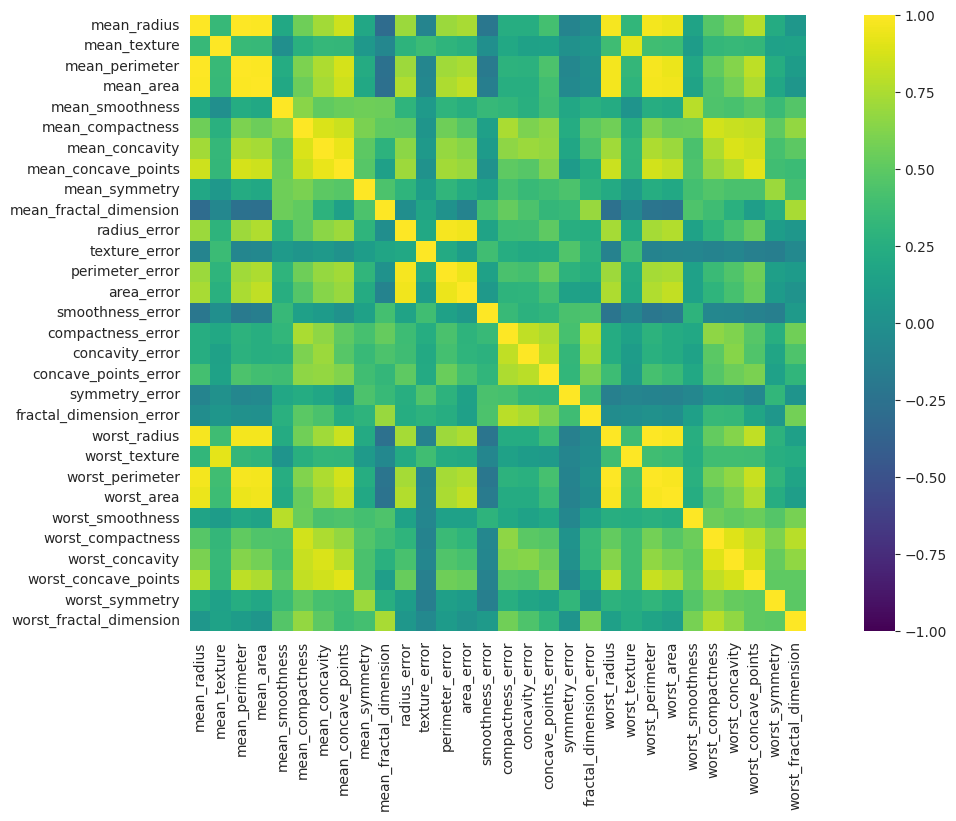

In [ ]:
corr_matrix = X_train.corr()

plt.figure(figsize=(15,8))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, cmap='viridis')

plt.tick_params(labelsize=10);

Some of the predictors are highly correlated because of geometry.  

Pair plots of some of the variables

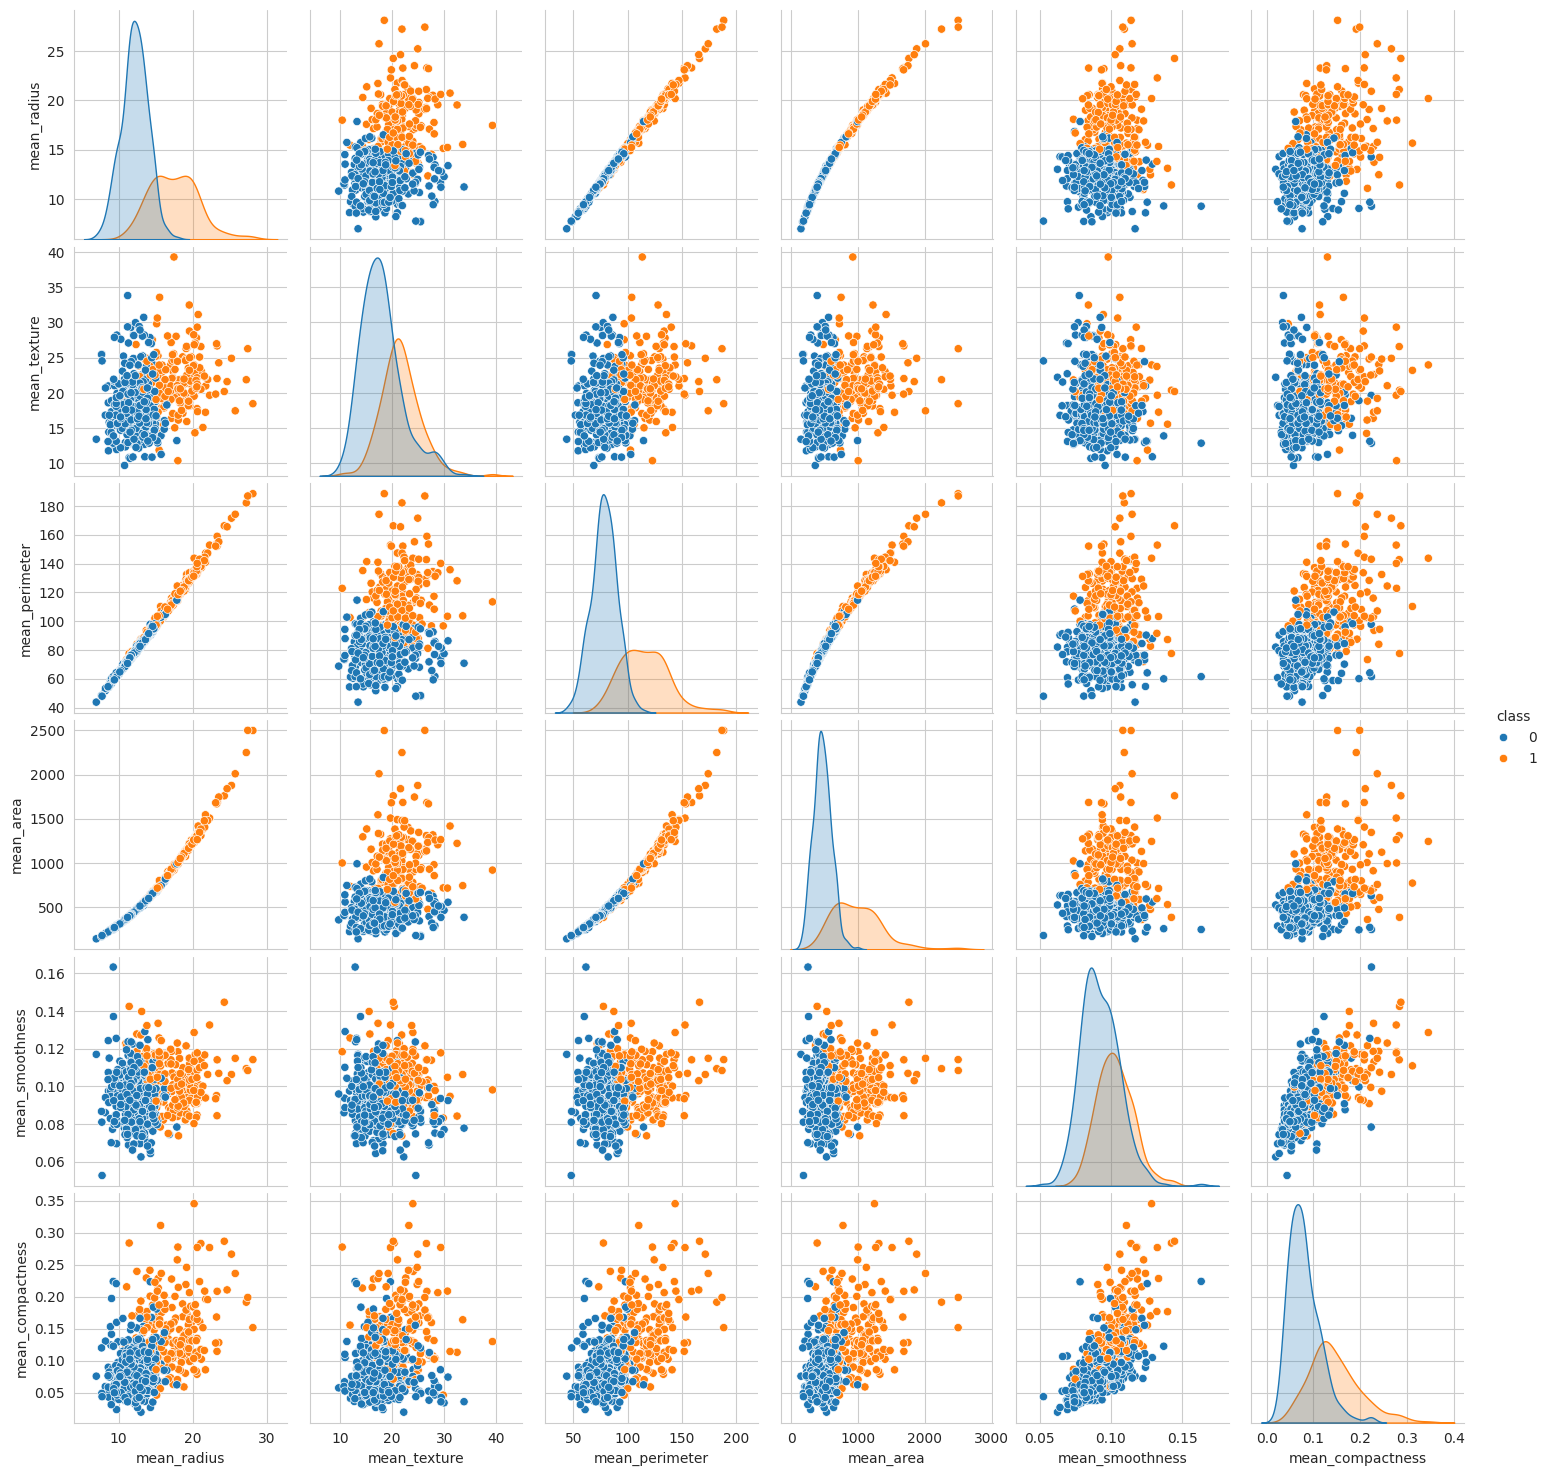

In [ ]:
sns.pairplot(data = df.iloc[:,np.r_[np.arange(6), 30]], hue='class');

Use of the interquartile range to identify outliers.

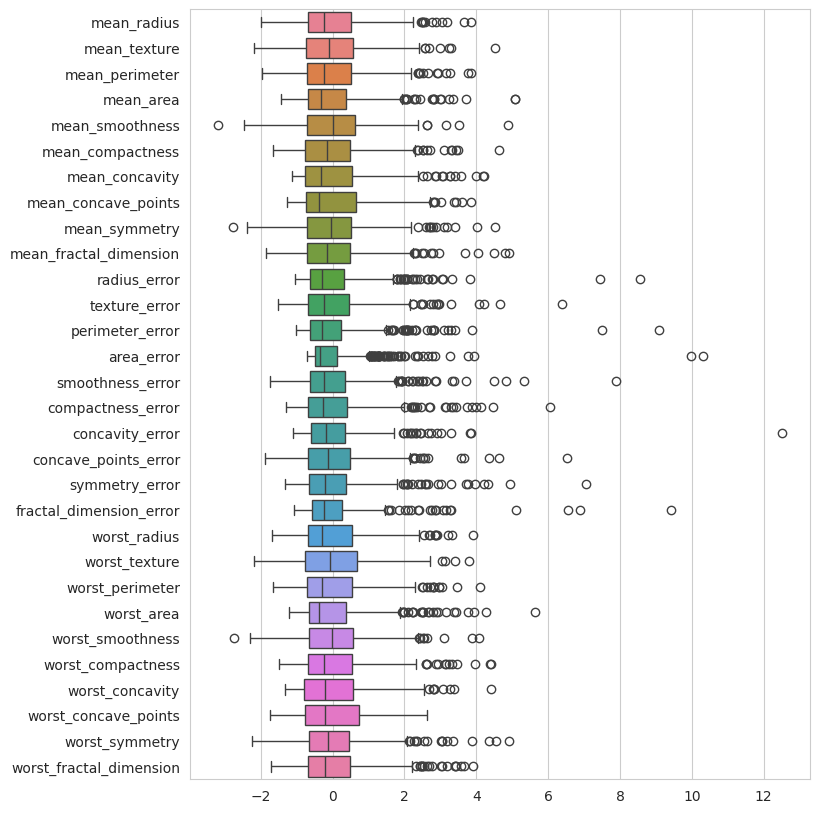

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(data=X_train, orient='h');

# Modeling

### Predict class probability from a single predictor

##### $\rightarrow$ Plot of the `mean_radius` of a tumor vs. the tumor class.

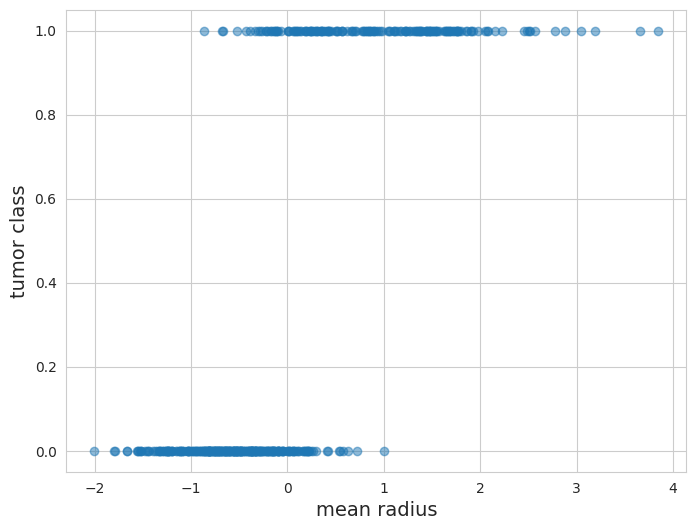

In [ ]:
plt.figure(figsize = (8,6))

plt.plot(df_train['mean_radius'], df_train['class'], 'o', alpha = 0.5)

plt.xlabel('mean radius', fontsize = 14)
plt.ylabel('tumor class', fontsize = 14);

Jitter of the points in the y-direction to visualize the density of points.

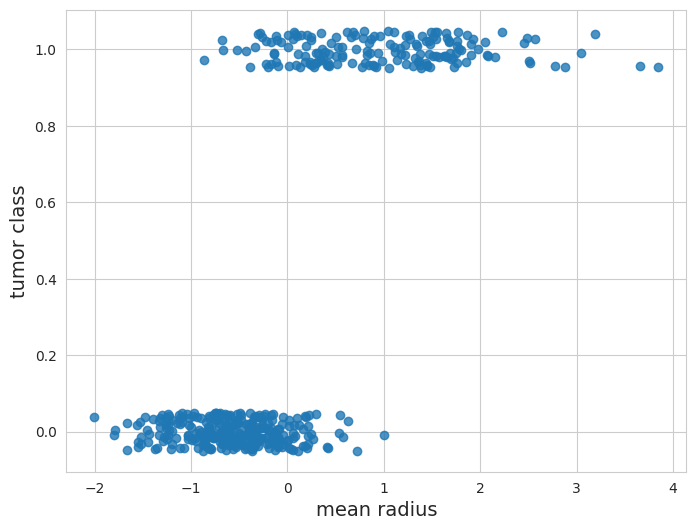

In [ ]:
plt.figure(figsize = (8,6))

sns.regplot(data = df_train, x = 'mean_radius', y = 'class', ci = None, fit_reg=False, y_jitter = 0.05)

plt.xlabel('mean radius', fontsize = 14)
plt.ylabel('tumor class', fontsize = 14);

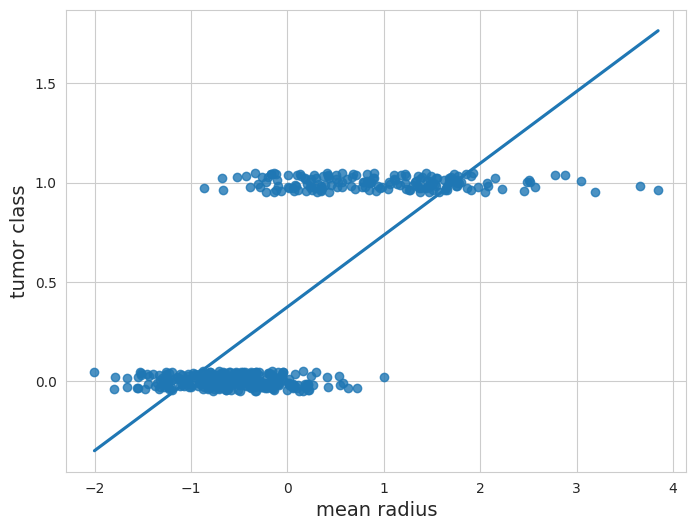

In [ ]:
plt.figure(figsize = (8,6))

sns.regplot(data = df_train, x = 'mean_radius', y = 'class', ci = None, y_jitter = 0.05)

plt.xlabel('mean radius', fontsize = 14)
plt.ylabel('tumor class', fontsize = 14);

The simple logistic regression model is:

$$P(Y = 1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}$$


##### $\rightarrow$ Use of seaborn's `lmplot` to plot the logistic regression model predicing the class of tumor from the `mean_radius` of a tumor.

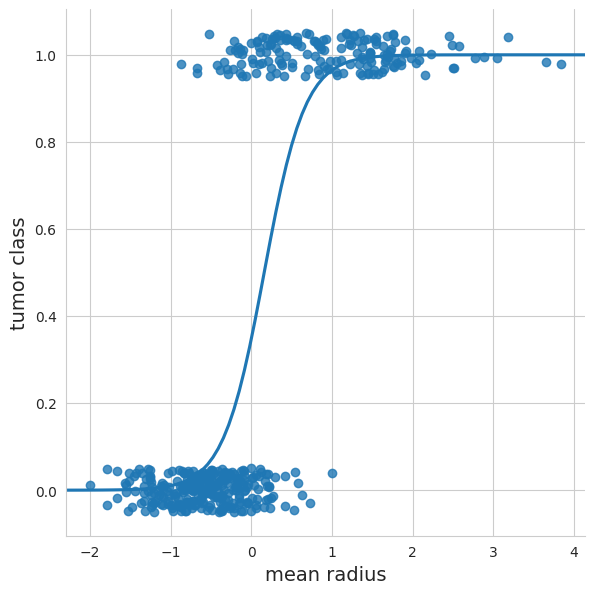

In [ ]:
sns.lmplot(data = df_train, x = 'mean_radius', y = 'class',
           y_jitter = 0.05, logistic = True, truncate = False, ci = None, height = 6)

plt.xlabel('mean radius', fontsize = 14)
plt.ylabel('tumor class', fontsize = 14);

## Logistic regression model for one predictor

##### $\rightarrow$ Fitting the logistic regression model using `mean_radius` as the predictor, using the training data.

In [ ]:
log_reg1 = sm.Logit(y_train, sm.add_constant(X_train['mean_radius'])).fit()

Optimization terminated successfully.
         Current function value: 0.267530
         Iterations 8


##### $\rightarrow$ Examination of the model coefficients and plot of the model along with the training data.

In [ ]:
print(log_reg1.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  455
Model:                          Logit   Df Residuals:                      453
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                  0.5952
Time:                        03:03:08   Log-Likelihood:                -121.73
converged:                       True   LL-Null:                       -300.69
Covariance Type:            nonrobust   LLR p-value:                 7.957e-80
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6318      0.164     -3.864      0.000      -0.952      -0.311
mean_radius     3.9418      0.403      9.773      0.000       3.151       4.732


<ipython-input-41-d69bd1175634>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_prob = expit(log_reg1.params[0] + log_reg1.params[1]*X_plot)


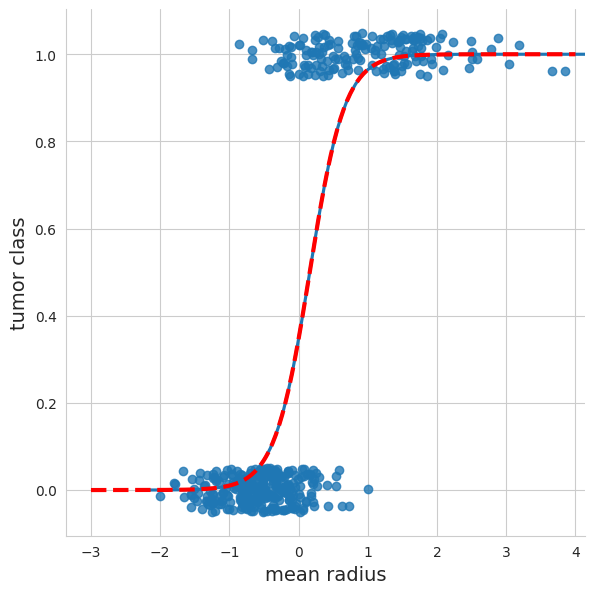

In [ ]:

sns.lmplot(data = df_train, x = 'mean_radius', y = 'class',
           y_jitter = 0.05, logistic = True, truncate = False, ci = None, height = 6)

X_plot = np.linspace(-3, 4, 300).reshape(-1,1)

model_prob = expit(log_reg1.params[0] + log_reg1.params[1]*X_plot)


# Plot
plt.plot(X_plot, model_prob, color="red", linewidth=3, linestyle = 'dashed')

plt.xlabel('mean radius', fontsize = 14)
plt.ylabel('tumor class', fontsize = 14);

### Evaluation of the model accuracy

<ipython-input-42-1e6c531cd7b9>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_prob = expit(log_reg1.params[0] + log_reg1.params[1]*X_plot)
<ipython-input-42-1e6c531cd7b9>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.vlines(-log_reg1.params[0]/log_reg1.params[1], -0.05, 1.05, 'cyan')


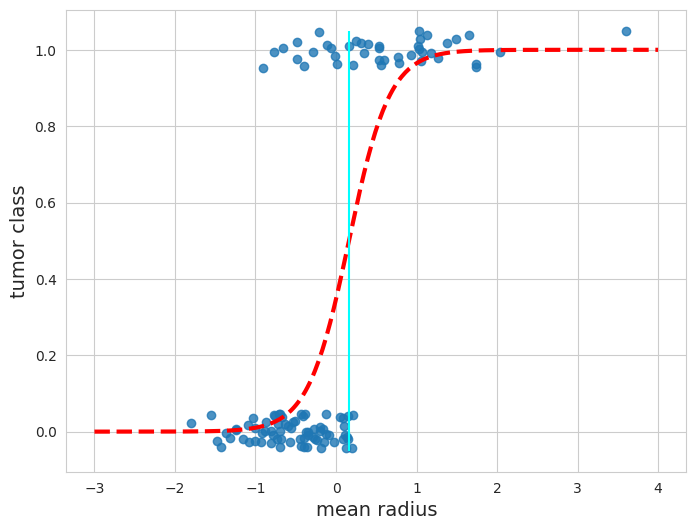

In [ ]:
plt.figure(figsize = (8,6))

sns.regplot(data = df_test, x = 'mean_radius', y = 'class', ci = None, fit_reg=False, y_jitter = 0.05)

#coefficients to plot the logisitic regression model
X_plot = np.linspace(-3, 4, 300).reshape(-1,1)

# model probability using the logistic function
model_prob = expit(log_reg1.params[0] + log_reg1.params[1]*X_plot)


# Plot
plt.plot(X_plot, model_prob, color="red", linewidth=3, linestyle = 'dashed')

# Plot of the decision boundary
plt.vlines(-log_reg1.params[0]/log_reg1.params[1], -0.05, 1.05, 'cyan')

plt.xlabel('mean radius', fontsize = 14)
plt.ylabel('tumor class', fontsize = 14);

##### $\rightarrow$ Prediction of the tumor class for the test data.

In [ ]:
log_reg1.predict(sm.add_constant(X_test['mean_radius']))

,0
421,0.472019
47,0.145551
292,0.118169
186,0.978883
414,0.590945
...,...
172,0.674325
3,0.024634
68,0.001858
448,0.428848


In [ ]:
pred1 = round(log_reg1.predict(sm.add_constant(X_test['mean_radius'])))



In [ ]:
pred1

,0
421,0.0
47,0.0
292,0.0
186,1.0
414,1.0
...,...
172,1.0
3,0.0
68,0.0
448,0.0


##### $\rightarrow$ Plot of confusion matrix to visualize the errors.

In [ ]:
mat1 = confusion_matrix(y_test, pred1)

In [ ]:
mat1

array([[70,  2],
       [13, 29]])

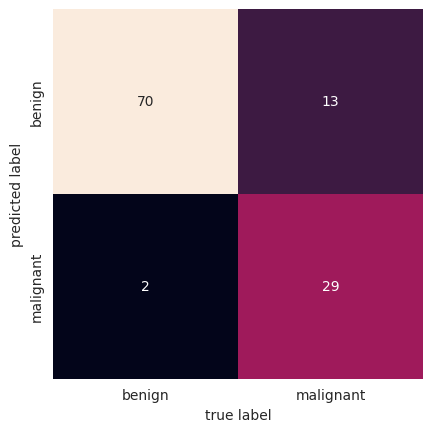

In [ ]:
sns.heatmap(mat1.T, square=True, annot=True, cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

##### $\rightarrow$ Computing the model accuracy.

In [ ]:
accuracy_score(y_test, pred1)

0.868421052631579

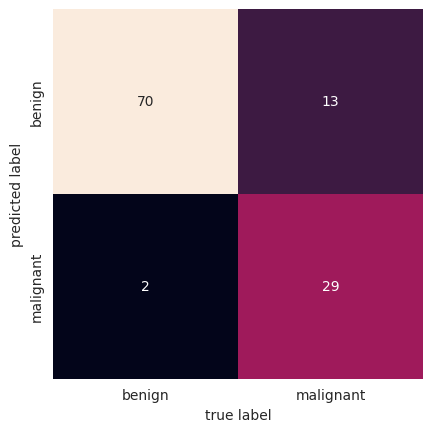

In [ ]:
sns.heatmap(mat1.T, square=True, annot=True, cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
print(classification_report(y_test, pred1, target_names=class_names))

              precision    recall  f1-score   support

      benign       0.84      0.97      0.90        72
   malignant       0.94      0.69      0.79        42

    accuracy                           0.87       114
   macro avg       0.89      0.83      0.85       114
weighted avg       0.88      0.87      0.86       114



### Compare to the null model

Comparision of the model performance to the null model where majority class for every observation is predicted.

In [ ]:
y_train.value_counts()

,count
class,
0,285
1,170


In [ ]:
pred_null = np.zeros(len(y_test))

In [ ]:
pred_null

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

##### $\rightarrow$ Confusion matrix to visualize the errors.

In [ ]:
mat_null = confusion_matrix(y_test, pred_null)

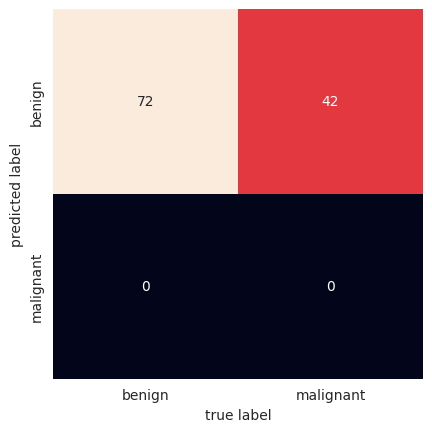

In [ ]:
sns.heatmap(mat_null.T, square=True, annot=True, cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
print(classification_report(y_test, pred1, target_names=class_names))

              precision    recall  f1-score   support

      benign       0.84      0.97      0.90        72
   malignant       0.94      0.69      0.79        42

    accuracy                           0.87       114
   macro avg       0.89      0.83      0.85       114
weighted avg       0.88      0.87      0.86       114



In [ ]:
print(classification_report(y_test, pred_null, target_names=class_names))

              precision    recall  f1-score   support

      benign       0.63      1.00      0.77        72
   malignant       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predict class probability from two predictors

##### $\rightarrow$ Plot of the `mean radius` and `worst concavity` of a tumor vs. the tumor class.

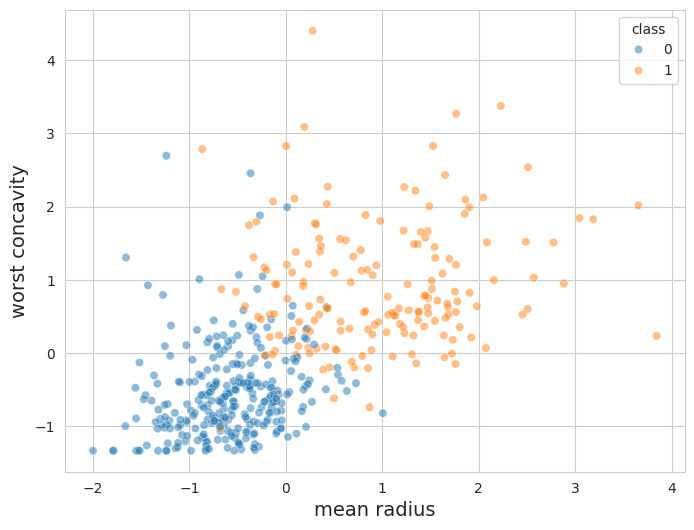

In [ ]:
plt.figure(figsize = (8,6))

sns.scatterplot(data = df_train, x = 'mean_radius', y = 'worst_concavity', hue = 'class', alpha = 0.5)

plt.xlabel('mean radius', fontsize = 14)
plt.ylabel('worst concavity', fontsize = 14);

##### $\rightarrow$ Fit the logistic regression model with predictors `mean radius` and `worst concavity`, using the training data.

In [ ]:
log_reg2 = sm.Logit(y_train, sm.add_constant(X_train[['mean_radius', 'worst_concavity']])).fit()

Optimization terminated successfully.
         Current function value: 0.169592
         Iterations 9


##### $\rightarrow$ Examine the model coefficients and plot the model decision boundary along with the training data.

In [ ]:
print(log_reg2.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  455
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            2
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                  0.7434
Time:                        03:03:11   Log-Likelihood:                -77.165
converged:                       True   LL-Null:                       -300.69
Covariance Type:            nonrobust   LLR p-value:                 8.396e-98
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0074      0.221     -4.550      0.000      -1.441      -0.573
mean_radius         3.8575      0.509      7.584      0.000       2.861       4.854
worst_concavity     2.2886      

In [ ]:
a, b, c = log_reg2.params.values

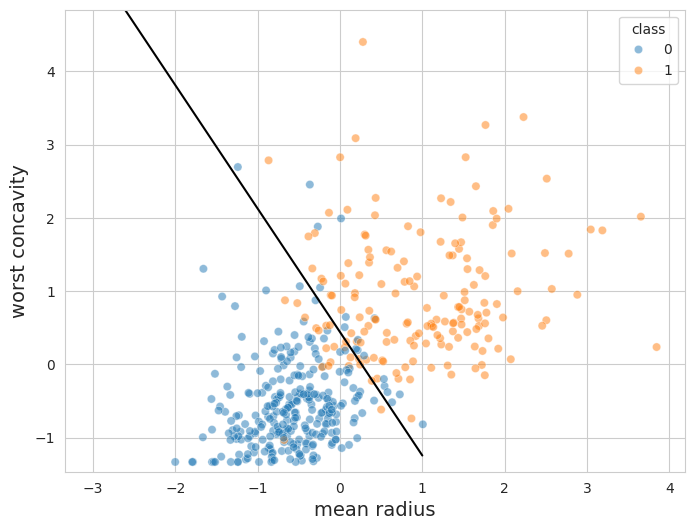

In [ ]:
plt.figure(figsize = (8,6))

sns.scatterplot(data = df_train, x = 'mean_radius', y = 'worst_concavity', hue = 'class', alpha = 0.5);

# Setting up plotting the decision boundary
a, b, c = log_reg2.params.values
x_boundary = np.linspace(-3, 1, 100)
y_boundary = (-a - b*x_boundary)/c

plt.plot(x_boundary, y_boundary, color = 'black')

plt.ylim(np.min(df_train['worst_concavity'])*1.1, np.max(df_train['worst_concavity'])*1.1)
plt.xlabel('mean radius', fontsize = 14)
plt.ylabel('worst concavity', fontsize = 14);

### Evaluate the model accuracy

##### $\rightarrow$ Plot the model decision boundary along with the test data.

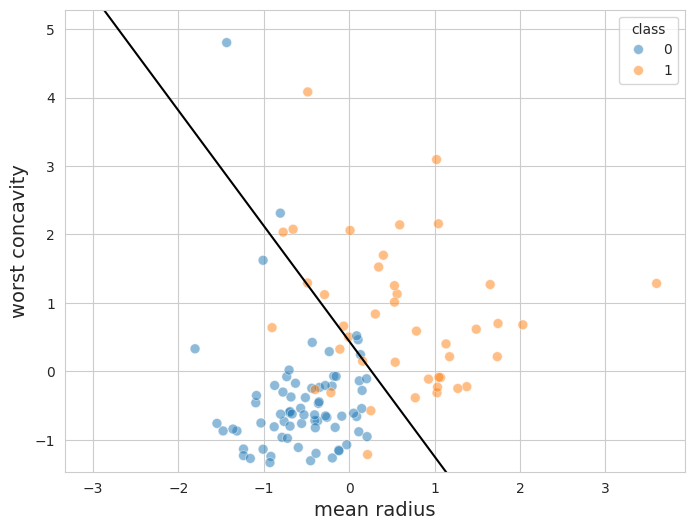

In [ ]:
plt.figure(figsize = (8,6))

sns.scatterplot(data = df_test, x = 'mean_radius', y = 'worst_concavity', hue = 'class', alpha = 0.5, s = 50);

a, b, c = log_reg2.params.values
x_boundary = np.linspace(-3, 2, 100)
y_boundary = (-a - b*x_boundary)/c

plt.plot(x_boundary, y_boundary, color = 'black')

plt.ylim(np.min(df_test['worst_concavity'])*1.1, np.max(df_test['worst_concavity'])*1.1)
plt.xlabel('mean radius', fontsize = 14)
plt.ylabel('worst concavity', fontsize = 14);

##### $\rightarrow$ Prediction of the tumor class for the test data.

In [ ]:
pred2 = round(log_reg2.predict(sm.add_constant(X_test[['mean_radius', 'worst_concavity']])))


##### $\rightarrow$ Confusion matrix to visualize the errors.

In [ ]:
mat2 = confusion_matrix(y_test, pred2)

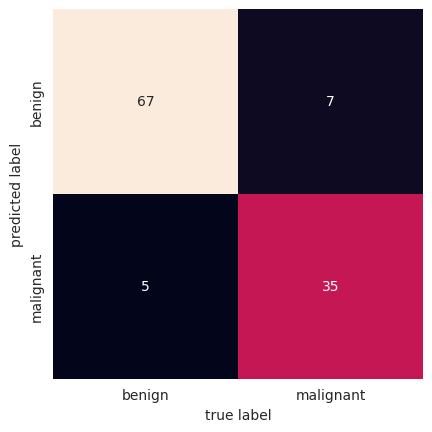

In [ ]:
sns.heatmap(mat2.T, square=True, annot=True, cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

##### $\rightarrow$ Computation of the model accuracy.

In [ ]:
accuracy_score(y_test, pred2)

0.8947368421052632

##### $\rightarrow$ Comparision of the model accuracy to the one-variable model on the same train/test split.

In [ ]:
accuracy_score(y_test, pred1)

0.868421052631579

In [ ]:
print(classification_report(y_test, pred1, target_names=class_names))

              precision    recall  f1-score   support

      benign       0.84      0.97      0.90        72
   malignant       0.94      0.69      0.79        42

    accuracy                           0.87       114
   macro avg       0.89      0.83      0.85       114
weighted avg       0.88      0.87      0.86       114



In [ ]:
print(classification_report(y_test, pred2, target_names=class_names))

              precision    recall  f1-score   support

      benign       0.91      0.93      0.92        72
   malignant       0.88      0.83      0.85        42

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114



## XGBoost

##### $\rightarrow$ Comparision of the model accuracy of the two-variable logistic regression model to an XGBoost model on the same train/test split.

In [ ]:
xgb_model = xgb.XGBClassifier()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 6),
    "n_estimators": randint(100, 150),
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model,
                            param_distributions=params,
                            n_iter=200,
                            cv=5,
                            verbose=1,
                            n_jobs=1,
                            return_train_score=True)

search.fit(X_train[['mean_radius', 'worst_concavity']], y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x784cfcd3ea70>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x784d04038820>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x784cfc9b81c0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x784cfcb63f40>},
                   return_train_score=True, verbose=1)

The best parameters are:

In [ ]:
search.best_params_

{'colsample_bytree': 0.735145027371953,
 'gamma': 0.41054160123075417,
 'learning_rate': 0.17050537080653877,
 'max_depth': 2,
 'n_estimators': 149,
 'subsample': 0.9507287612890234}

Creating an xgboost classification model object with these parameters

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.set_params(**search.best_params_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.735145027371953, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.41054160123075417,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17050537080653877,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=149, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Fitting the model with the training data

In [ ]:
xgb_model.fit(X_train[['mean_radius', 'worst_concavity']], y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.735145027371953, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.41054160123075417,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17050537080653877,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=149, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Plot of the variable importances

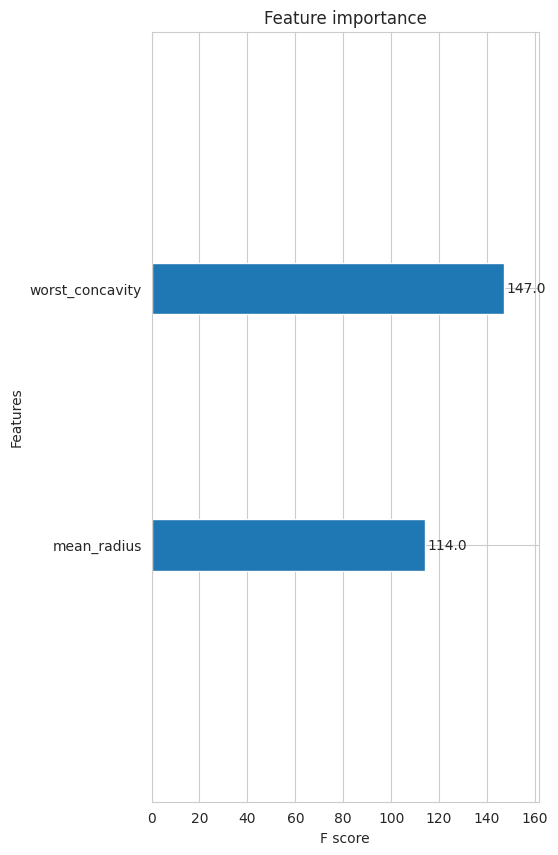

In [ ]:
fig, ax = plt.subplots(figsize = (5,10))
xgb.plot_importance(xgb_model, ax = ax);

##### $\rightarrow$ Predicting the tumor class for the test data.

In [ ]:
pred_mgb = xgb_model.predict(X_test[['mean_radius', 'worst_concavity']])

##### $\rightarrow$ Confusion matrix to visualize the errors.

In [ ]:
mat_mgb = confusion_matrix(y_test, pred_mgb)

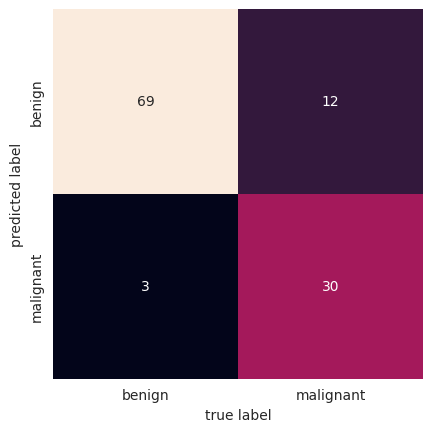

In [ ]:
sns.heatmap(mat_mgb.T, square=True, annot=True, cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Comparison to the previous models

In [ ]:
print(classification_report(y_test, pred1, target_names=class_names))

              precision    recall  f1-score   support

      benign       0.84      0.97      0.90        72
   malignant       0.94      0.69      0.79        42

    accuracy                           0.87       114
   macro avg       0.89      0.83      0.85       114
weighted avg       0.88      0.87      0.86       114



In [ ]:
print(classification_report(y_test, pred2, target_names=class_names))

              precision    recall  f1-score   support

      benign       0.91      0.93      0.92        72
   malignant       0.88      0.83      0.85        42

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114



In [ ]:
print(classification_report(y_test, pred_mgb, target_names=class_names))

              precision    recall  f1-score   support

      benign       0.85      0.96      0.90        72
   malignant       0.91      0.71      0.80        42

    accuracy                           0.87       114
   macro avg       0.88      0.84      0.85       114
weighted avg       0.87      0.87      0.86       114



### XGBoost with all predictors

##### $\rightarrow$ Comparison of the model accuracy to an XGBoost model involving all predictors on the same train/test split.

In [ ]:
xgb_model = xgb.XGBClassifier()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 6),
    "n_estimators": randint(100, 150),
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model,
                            param_distributions=params,
                            n_iter=200,
                            cv=5,
                            verbose=1,
                            n_jobs=1,
                            return_train_score=True)

search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x784cfb5038b0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x784cfb501e70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x784cfb503190>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x784cfb5015d0>},
                   return_train_score=True, verbose=1)

The best parameters are:

In [ ]:
search.best_params_

{'colsample_bytree': 0.8889874115972564,
 'gamma': 0.3154217539262315,
 'learning_rate': 0.30210437351640984,
 'max_depth': 3,
 'n_estimators': 116,
 'subsample': 0.6966994128177131}

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.set_params(**search.best_params_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8889874115972564, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3154217539262315,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.30210437351640984,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=116, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8889874115972564, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3154217539262315,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.30210437351640984,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=116, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Plot of the variable importances

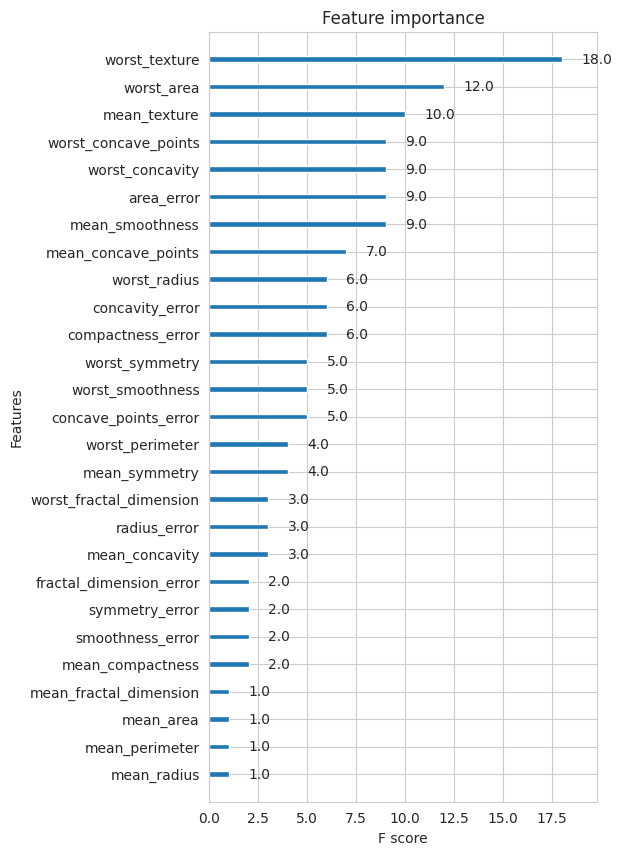

In [ ]:
fig, ax = plt.subplots(figsize = (5,10))
xgb.plot_importance(xgb_model, ax = ax);

##### $\rightarrow$ Predicting the tumor class for the test data.

In [ ]:
pred_mgb = xgb_model.predict(X_test)

##### $\rightarrow$ Confusion matrix to visualize the errors.

In [ ]:
mat_mgb = confusion_matrix(y_test, pred_mgb)

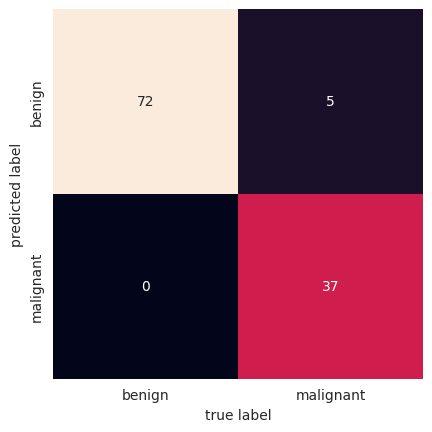

In [ ]:
sns.heatmap(mat_mgb.T, square=True, annot=True, cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Comparison to the previous models

In [ ]:
print(classification_report(y_test, pred1, target_names=class_names))

              precision    recall  f1-score   support

      benign       0.84      0.97      0.90        72
   malignant       0.94      0.69      0.79        42

    accuracy                           0.87       114
   macro avg       0.89      0.83      0.85       114
weighted avg       0.88      0.87      0.86       114



In [ ]:
print(classification_report(y_test, pred2, target_names=class_names))

              precision    recall  f1-score   support

      benign       0.91      0.93      0.92        72
   malignant       0.88      0.83      0.85        42

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114



In [ ]:
print(classification_report(y_test, pred_mgb, target_names=class_names))

              precision    recall  f1-score   support

      benign       0.94      1.00      0.97        72
   malignant       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

